In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
import ast
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [11]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [24]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
df_DA = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
                                                   

In [28]:
df_DA = df_DA.dropna(subset= "salary_year_avg")

In [29]:
df_DA["salary_year_avg"].sample(10)

695496     90000.0
123621    125000.0
612678    140000.0
378273    100000.0
768662     93000.0
257695     82830.0
258653    160831.0
672928    125000.0
780757    150000.0
237832    115000.0
Name: salary_year_avg, dtype: float64

In [108]:
job_list = [df_DA[df_DA["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]
job_list.plot(kind = "box")

AttributeError: 'list' object has no attribute 'plot'

/var/folders/v2/k0pjj8ms2nd5y__x0cxrdmy80000gn/T/ipykernel_7235/3273406899.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


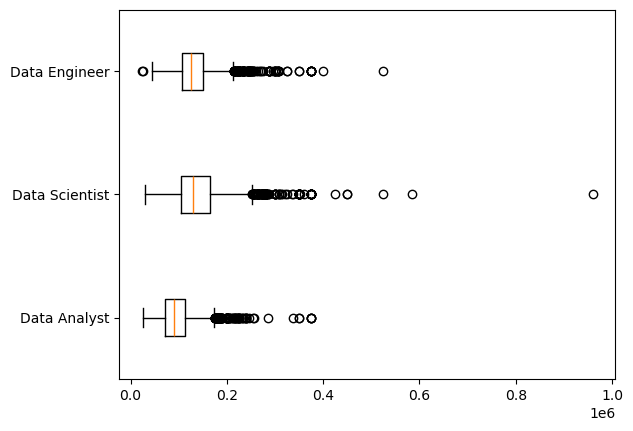

In [43]:
plt.boxplot(job_list, labels = job_titles, vert = False)
plt.show()

In [54]:
#df_DA = df[(df[["salary_hour_avg"]== "Data Analsyt"]) & (df[["job_country"] == "United States"])]


df_Da = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")]
df_Da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [57]:
df_USA = df_Da.dropna(subset= "salary_hour_avg")

In [60]:
salary = df_USA["salary_hour_avg"]

(0.0, 150.0)

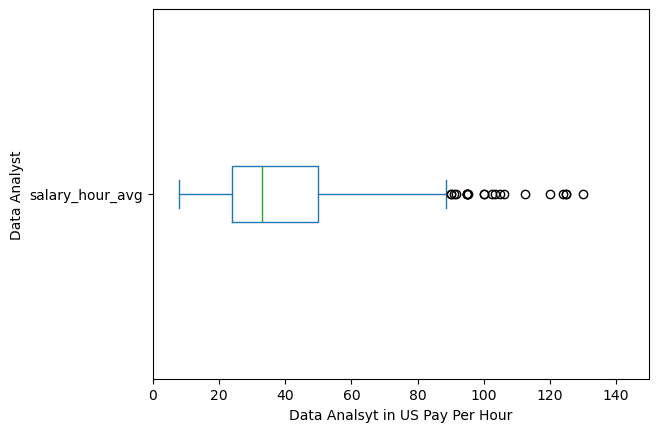

In [68]:
df_USA["salary_hour_avg"].plot(kind = "box", vert = False)
plt.xlabel("Data Analsyt in US Pay Per Hour")
plt.ylabel("Data Analyst")
plt.xlim(0,150)

In [110]:
countries  = ["United States", "Canada"]
df_country = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"].isin(countries))].copy()
                                                            

In [111]:
df_country["job_country"].sample(10)

345925    United States
146158    United States
377343    United States
575801    United States
33224     United States
452511    United States
250028    United States
535317           Canada
427922    United States
627513    United States
Name: job_country, dtype: object

In [112]:
df_country["salary_hour_avg"].sample(10)

543359   NaN
132115   NaN
352476   NaN
745529   NaN
88438    NaN
739606   NaN
580597   NaN
686806   NaN
542445   NaN
737309   NaN
Name: salary_hour_avg, dtype: float64

In [113]:
us_can = df_country.dropna(subset= "salary_hour_avg")

In [125]:
us_can

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
294,Data Analyst,Business/Data Analyst,"Hartford, CT",via Dice,Contractor,False,"New York, United States",2023-07-03 13:00:08,False,False,United States,hour,NaN,52.500000,"Vector Consulting, Inc",None,None
340,Data Analyst,23-00059 BI Data Analysts + Media experience -...,California,via LinkedIn,Contractor,False,"California, United States",2023-02-28 13:01:46,True,False,United States,hour,NaN,67.500000,"iSpace, Inc.","[go, sql, aws, snowflake, tableau, looker, word]","{'analyst_tools': ['tableau', 'looker', 'word'..."
513,Data Analyst,Data Analyst,"Long Island City, NY",via Indeed,Full-time,False,"New York, United States",2023-05-09 12:59:58,False,False,United States,hour,NaN,22.500000,JK.com,"[sql, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
840,Data Analyst,Data Analysis/ Project Coordinator/ BA,"Jersey City, NJ",via Dice,Contractor,False,"New York, United States",2023-09-19 12:59:57,False,False,United States,hour,NaN,65.000000,Ionidea,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
954,Data Analyst,Financial Data Analyst,"San Antonio, TX",via Robert Half,Contractor,False,"Texas, United States",2023-06-27 13:01:51,False,False,United States,hour,NaN,76.875000,Robert Half,"[python, c, sql, sas, sas]","{'analyst_tools': ['sas'], 'programming': ['py..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781805,Data Analyst,"Lead Data Analytic Analyst, FIN","Centertown, MO",via Snagajob,Full-time,False,"Illinois, United States",2023-08-07 06:01:15,False,True,United States,hour,NaN,23.264999,EDWARD JONES,None,None
781853,Data Analyst,Remote Jr Java programmer/Data Analyst/Data Sc...,"Indianapolis, IN",via Snagajob,Full-time and Part-time,False,Georgia,2023-09-16 06:55:42,False,False,United States,hour,NaN,30.660000,SynergisticIT,"[java, javascript, c++, sas, sas, python, orac...","{'analyst_tools': ['sas', 'tableau'], 'cloud':..."
783013,Data Analyst,Research Data Analyst,"Warner Robins, GA",via Snagajob,Full-time and Part-time,False,Georgia,2023-09-13 07:05:20,False,True,United States,hour,NaN,22.695000,"HX5, LLC",None,None
783578,Data Analyst,"Lead Data Analytic Analyst, FIN - Now Hiring","Loami, IL",via Snagajob,Full-time,False,"Illinois, United States",2023-08-07 06:01:10,False,True,United States,hour,NaN,23.760000,EDWARD JONES,None,None


In [130]:
us_can[["job_country", "salary_hour_avg"]]

,job_country,salary_hour_avg
294,United States,52.500000
340,United States,67.500000
513,United States,22.500000
840,United States,65.000000
954,United States,76.875000
...,...,...
781805,United States,23.264999
781853,United States,30.660000
783013,United States,22.695000
783578,United States,23.760000


In [137]:
comparison =[us_can[us_can["job_country"] == country]["salary_hour_avg"] for country in countries]

/var/folders/v2/k0pjj8ms2nd5y__x0cxrdmy80000gn/T/ipykernel_7235/3972804679.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comparison, labels = countries, vert= False)


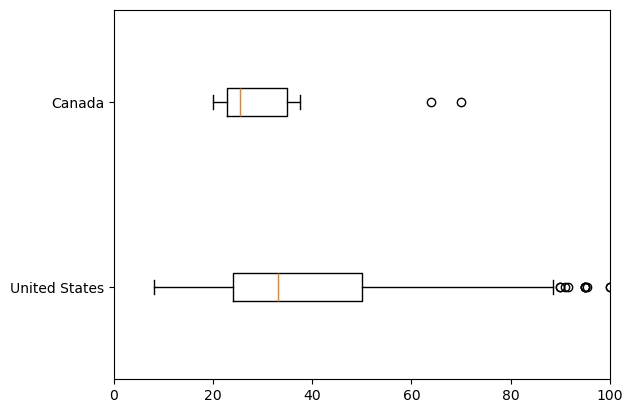

In [123]:
plt.boxplot(comparison, labels = countries, vert= False)
plt.xlim(0,100)
plt.show()

In [146]:
jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist']


In [149]:
df_germany = df[(df["job_country"] == "Germany") & (df["job_title_short"].isin(jobs))]

In [150]:
df_germany.sample(6)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
137335,Data Engineer,Data Engineer (m/w/d),"Weeze, Germany",via Stepstone,Full-time,False,Germany,2023-06-29 08:12:52,True,False,Germany,None,NaN,NaN,CHEFS CULINAR West GmbH & Co. KG,[oracle],{'cloud': ['oracle']}
296899,Data Engineer,Data Engineer (m/f/d),"Cologne, Germany",via LinkedIn,Full-time,False,Germany,2023-01-04 02:50:11,True,False,Germany,None,NaN,NaN,REWE Group,"[python, scala, sql, aws, azure, bigquery, spark]","{'cloud': ['aws', 'azure', 'bigquery'], 'libra..."
324193,Data Scientist,Director of Data Science (f/m/x),"Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-12 17:32:04,False,False,Germany,year,166941.5,NaN,AUTO1 Group,"[python, aws, redshift, fastapi, jenkins, terr...","{'cloud': ['aws', 'redshift'], 'other': ['jenk..."
571626,Data Engineer,Senior- Cloud Data Engineer w/m/d,"Essen, Germany",via Jobijoba.de,Full-time,False,Germany,2023-09-29 09:15:43,True,False,Germany,None,NaN,NaN,GALERIA Karstadt Kaufhof,"[sql, snowflake, qlik]","{'analyst_tools': ['qlik'], 'cloud': ['snowfla..."
571149,Data Engineer,Data Engineer/data Scientist (w/m/d) - Product...,"Offenburg, Germany",via Jobs,Full-time,False,Germany,2023-11-05 09:35:30,False,False,Germany,None,NaN,NaN,tesa Werk Offenburg GmbH,None,None
482661,Data Engineer,Berater ServiceNow - Data & Analytics (w/m/d),"Hamburg, Germany",via LinkedIn,Full-time,False,Germany,2023-12-22 14:18:13,True,False,Germany,None,NaN,NaN,EY,None,None


In [152]:
df_germany = df_germany.dropna(subset="salary_hour_avg")

In [156]:
df_germany["salary_hour_avg"]

71360     25.0
79681     25.0
98975     25.0
108890    25.0
333869    25.0
Name: salary_hour_avg, dtype: float64

In [158]:
germany_date = [df_germany[df_germany["job_title_short"] == job]["salary_hour_avg"]   for job in jobs]

/var/folders/v2/k0pjj8ms2nd5y__x0cxrdmy80000gn/T/ipykernel_7235/3099542604.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(germany_date, labels = jobs, vert = False)


{'whiskers': [<matplotlib.lines.Line2D at 0x15bef44d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15beced90>,
 'boxes': [<matplotlib.lines.Line2D at 0x15bef7a10>,
 'medians': [<matplotlib.lines.Line2D at 0x15be88310>,
 'fliers': [<matplotlib.lines.Line2D at 0x15be8b990>,
 'means': []}

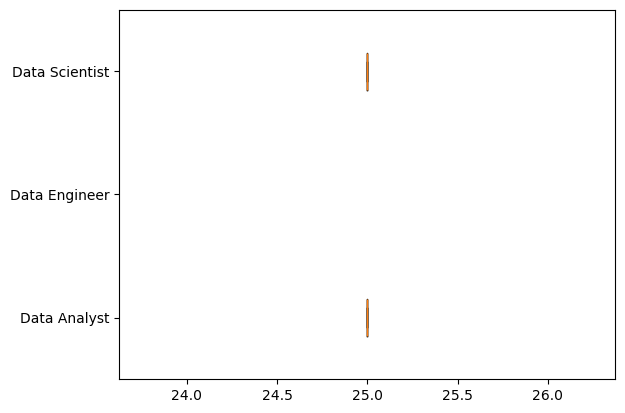

In [159]:
plt.boxplot(germany_date, labels = jobs, vert = False)